In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
import seaborn as sns
import pymc3 as pm
import arviz as az
import pandas as pd

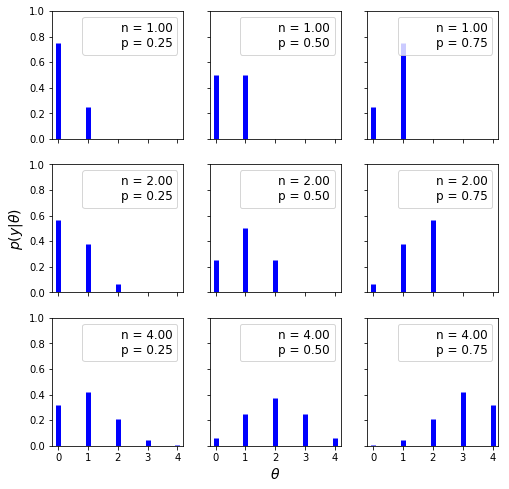

In [22]:
#binomial
n_params = [1, 2, 4]
p_params = [0.25, 0.5, 0.75]
x = np.arange(0, max(n_params) + 1)
f, ax = plt.subplots(len(n_params), len(p_params), figsize=(8,8),sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i, j].vlines(x, 0, y, colors="b", lw=5)
        ax[i, j].set_ylim(0,1)
        ax[i, j].plot(0, 0, label="n = {:3.2f}\np = {:3.2f}".format(n,p), alpha=0)
        ax[i, j].legend(fontsize=12)
    ax[2, 1].set_xlabel("$\\theta$", fontsize=14)
    ax[1, 0].set_ylabel("$p(y|\\theta)$", fontsize=14)
    ax[0, 0].set_xticks(x)
    

Text(0, 0.5, '$p(\\theta)$')

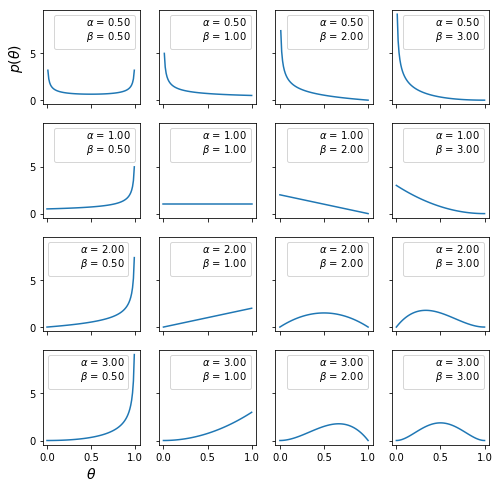

In [26]:
#beta
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), figsize=(8, 8), sharex=True, sharey=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i, j].plot(x, y)
        ax[i, j].plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(a, b), alpha=0)
        ax[i, j].legend(fontsize=10)
ax[3, 0].set_xlabel("$\\theta$", fontsize=14)
ax[0, 0].set_ylabel("$p(\\theta)$", fontsize=14)

In [46]:
#grid computing
def posterior_grid(grid_points=100, heads=6, tosses=9):
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(5, grid_points)
    likelihood = stats.binom.pmf(heads, tosses, grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    return grid, posterior

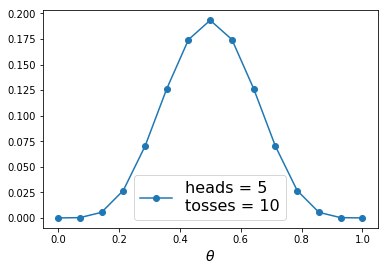

In [49]:
points = 15
h, n = 5, 10
grid, posterior = posterior_grid(points, h, n)
plt.plot(grid, posterior, "o-", label="heads = {}\ntosses = {}".format(h, n))
plt.xlabel(r"$\theta$", fontsize=14)
plt.legend(loc=0, fontsize=16)

In [292]:
np.random.seed(123)
n_experiments = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[1 0 0 0]


In [293]:
with pm.Model() as our_first_model:
    theta = pm.Beta("theta", alpha=1, beta=1)
    y = pm.Bernoulli("y", p=theta, observed=data)

In [294]:
with our_first_model:
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(1000, start=start, step=step)

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -2.7726, ||grad|| = 1: 100%|██████████| 6/6 [00:00<00:00, 2360.11it/s]
Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [theta]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:00<00:00, 10812.85draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c352a7518>,
      dtype=object)

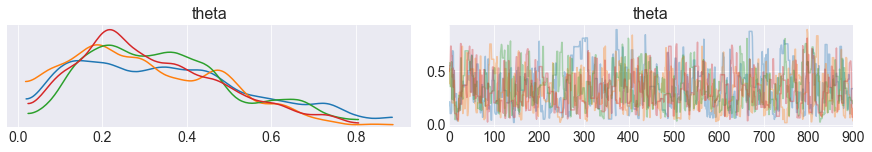

In [295]:
burnin = 100
chain = trace[burnin:]
az.plot_trace(chain, lines={"theta":theta_real})

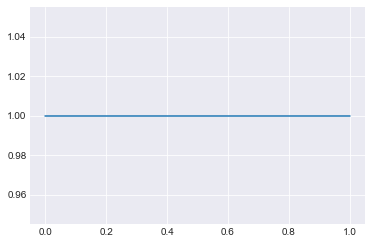

In [302]:
# prior probability
y = stats.beta(1, 1).pdf(data)
plt.plot(data, y)

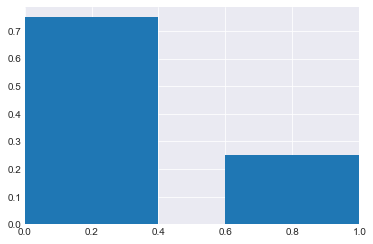

In [316]:
#data
a = 1 / 4
b = 3 / 4
plt.bar((1, 0), (a, b))
plt.xlim(0, 1)
plt.show()

In [148]:
pm.gelman_rubin(chain)

{'theta': 1.0053932662541676}

(<Figure size 432x316.8 with 1 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c26b4fe80>],
       dtype=object))

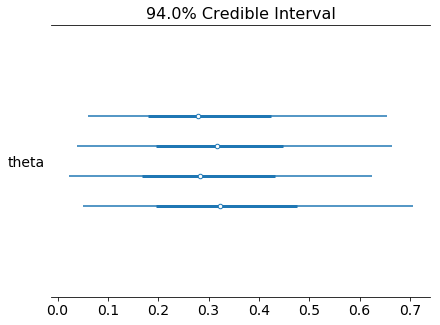

In [155]:
az.plot_forest(chain, var_names="theta")

In [156]:
pm.summary(chain)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
theta,0.324706,0.182671,0.007017,0.028867,0.681435,596.170316,1.005393


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c21454d68>,
      dtype=object)

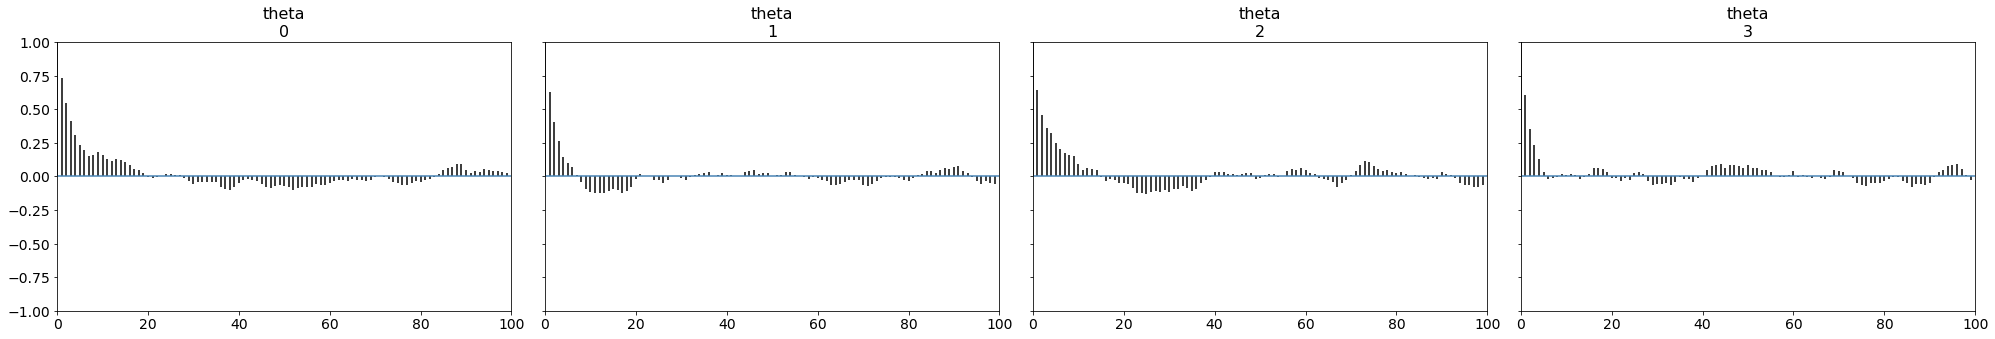

In [193]:
az.plot_autocorr(chain)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c258f9128>],
      dtype=object)

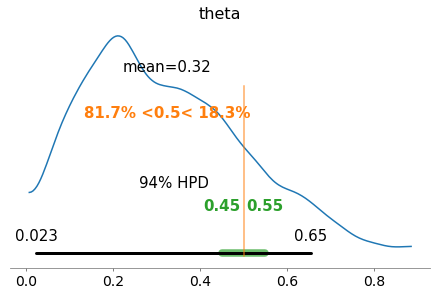

In [162]:
az.plot_posterior(chain, rope=[0.45, 0.55], ref_val=0.5)

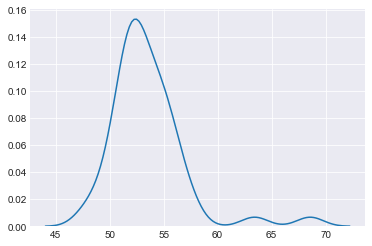

In [318]:
plt.style.use("seaborn-darkgrid")
np.set_printoptions(precision=2)
pd.set_option("display.precision", 2)

data = np.array([51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34, 55.65, 51.49, 51.86, 63.43, 
                53.00, 56.09, 51.93, 52.31, 52.33, 57.48, 57.44, 55.14, 53.93, 54.62, 56.09, 68.58,
                51.36, 55.47, 50.73, 51.94, 54.95, 50.39, 52.91, 51.50, 52.68, 47.72, 49.73, 51.82, 
                54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.30, 53.84, 53.16])
sns.kdeplot(data)

In [207]:
with pm.Model() as model_g:
    mu = pm.Uniform("mu", 40, 75)
    sigma = pm.HalfNormal("sigma", sd=10)
    y = pm.Normal("y", mu=mu, sd=sigma, observed=data)
    trace_g = pm.sample(1100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]
Sampling 4 chains: 100%|██████████| 6400/6400 [00:01<00:00, 4981.98draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c27ef7208>,
      dtype=object)

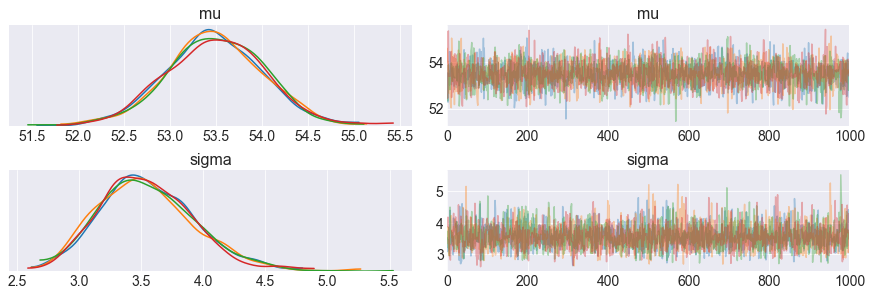

In [209]:
burnin = 100
chain = trace_g[burnin:]
az.plot_trace(chain)

In [211]:
df = pm.summary(chain)
df

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,53.49,0.53,8.15e-03,52.42,54.47,3316.03,1.0
sigma,3.55,0.38,6.19e-03,2.78,4.25,3362.57,1.0


/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|██████████| 100/100 [00:00<00:00, 1158.43it/s]
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs 

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases 

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases 

Text(0.5, 0, '$x$')

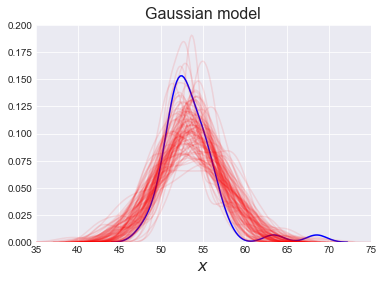

In [230]:
y_pred = pm.sample_ppc(chain, 100, model_g, size=len(data))
sns.kdeplot(data, c="b")
for i in y_pred["y"]:
    sns.kdeplot(i[0], c="r", alpha=0.1)
    
plt.xlim(35, 75)
plt.title("Gaussian model", fontsize=16)
plt.xlabel("$x$", fontsize=16)

(-7, 7)

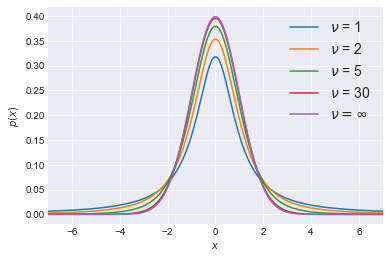

In [235]:
x_values = np.linspace(-10, 10, 200)
for df in [1, 2, 5, 30]:
    distri = stats.t(df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, label=r"$\nu$ = {}".format(df))
    
x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, label=r"$\nu = \infty$")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.legend(loc=0, fontsize=14)
plt.xlim(-7, 7)

In [236]:
with pm.Model() as model_t:
    mu = pm.Uniform("mu", 40, 75)
    sigma = pm.HalfNormal("sigma", sd=10)
    nu = pm.Exponential("nu", 1/30)
    y = pm.StudentT("y", mu=mu, sd=sigma, nu=nu, observed=data)
    trace_t = pm.sample(1100)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma, mu]
Sampling 4 chains: 100%|██████████| 6400/6400 [00:01<00:00, 3465.48draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2a49dd68>,
      dtype=object)

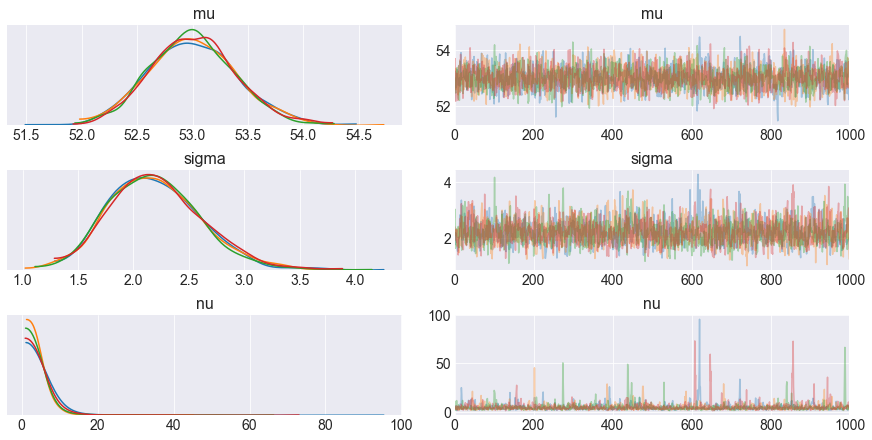

In [237]:
chain_t = trace_t[100:]
az.plot_trace(chain_t)

In [238]:
pm.summary(chain_t)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
mu,53.01,0.39,7.91e-03,52.25,53.77,2450.55,1.0
sigma,2.21,0.42,9.29e-03,1.43,3.02,1833.03,1.0
nu,4.70,4.50,1.14e-01,1.15,9.94,1404.66,1.0


/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  """Entry point for launching an IPython kernel.
100%|██████████| 100/100 [00:00<00:00, 1135.51it/s]
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs 

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases 

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


Text(0.5, 0, '$x$')

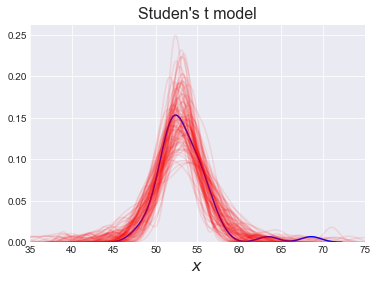

In [240]:
y_pred = pm.sample_ppc(chain_t, 100, model_t, size=len(data))
sns.kdeplot(data, c="b")
for i in y_pred["y"]:
    sns.kdeplot(i[0], c="r", alpha=0.1)
    
plt.xlim(35, 75)
plt.title("Studen's t model", fontsize=16)
plt.xlabel("$x$", fontsize=16)

In [241]:
tips = sns.load_dataset("tips")
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


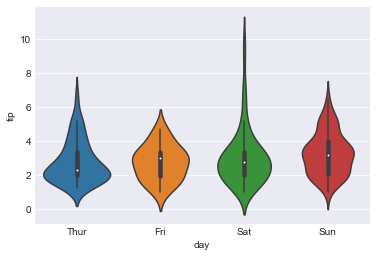

In [242]:
sns.violinplot(x="day", y="tip", data=tips)

In [280]:
y = tips["tip"].values
idx = pd.Categorical(tips["day"]).codes

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sds, means]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:14<00:00, 1504.29draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2b020710>,
      dtype=object)

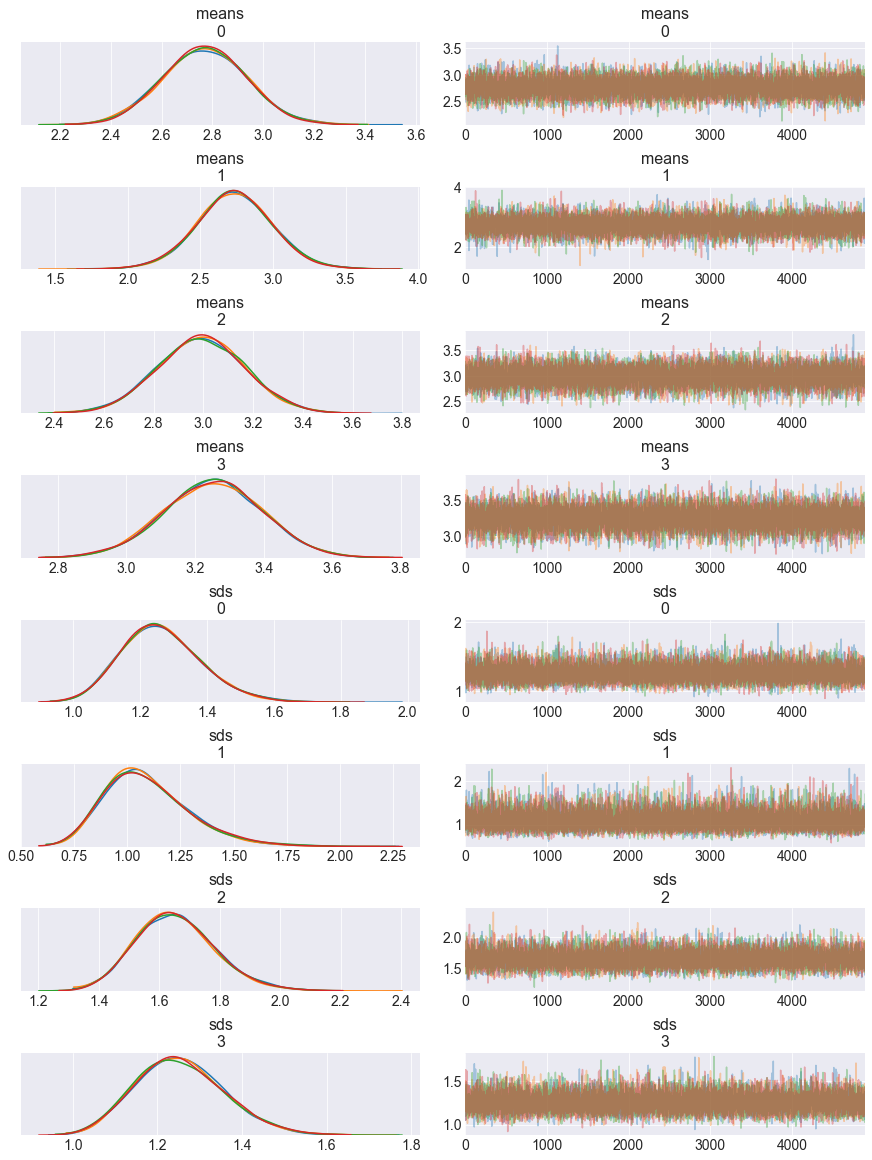

In [269]:
with pm.Model() as comparig_groups:
    means = pm.Normal("means", mu=0, sd=10, shape=len(set(idx)))
    sds = pm.HalfNormal("sds", sd=10, shape=len(set(idx)))
    y=pm.Normal("y", mu=means[idx], sd=sds[idx], observed=y)
    
    trace_cg = pm.sample(5000)
    
chain_cg = trace_cg[100::]
az.plot_trace(chain_cg)

Text(0.5, 0, '$y$')

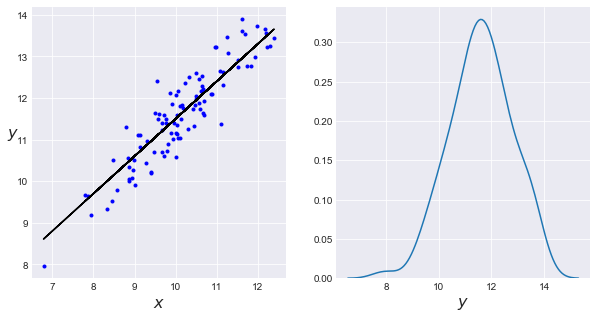

In [282]:
np.random.seed(314)
N = 100
alpha_real = 2.5
beta_real = 0.9
eps_real = np.random.normal(0, 0.5, size=N)

x = np.random.normal(10, 1, N)
y_real = alpha_real + beta_real * x
y = y_real + eps_real

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(x, y, "b.")
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.plot(x, y_real, "k")
plt.subplot(1, 2, 2)
sns.kdeplot(y)
plt.xlabel("$y$", fontsize=16)

In [283]:
with pm.Model() as model:
    alpha = pm.Normal("alpha", mu=0, sd=10)
    beta = pm.Normal("beta", mu=0, sd=1)
    epsilon = pm.HalfCauchy("epsilon", 5)
    
    mu = pm.Deterministic("mu", alpha + beta * x)
    y_pred = pm.Normal("y_pred", mu=mu, sd=epsilon, observed=y)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(1100, step, start)

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -71.578, ||grad|| = 0.14936: 100%|██████████| 36/36 [00:00<00:00, 1986.98it/s]         
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [epsilon]
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████| 6400/6400 [00:00<00:00, 6500.77draws/s]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [284]:
trace_n = trace[1000:]
az.plot_trace(trace_n)

/Users/morishuuya/.pyenv/versions/anaconda3-2019.03/envs/base2/lib/python3.7/site-packages/arviz/plots/traceplot.py:155: SyntaxWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (103), generating only 40 plots
  SyntaxWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2f64eb70>,
      dtype=object)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1177b9488> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1177c5d90> (for post_execute):


KeyboardInterrupt: 

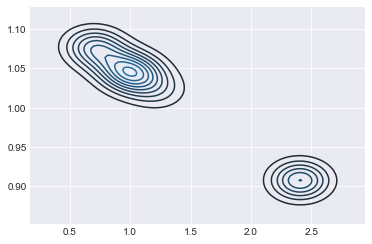

In [287]:
sns.kdeplot(trace_n["alpha"], trace_n["beta"])

In [63]:
from os import makedirs
makedirs("data", exist_ok=True)

In [3]:
from urllib.request import urlretrieve
urlretrieve("https://git.io/vXTVC", "data/txtdata.csv")

('data/txtdata.csv', <http.client.HTTPMessage at 0x1a1a928f98>)

<BarContainer object of 74 artists>

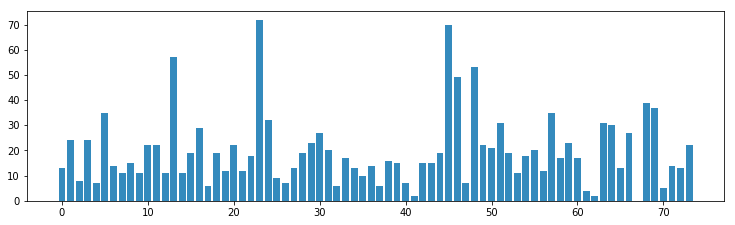

In [64]:
from IPython.core.pylabtools import figsize
figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")

In [68]:

with pm.Model() as model:
    alpha = 1 / count_data.mean()
    days = np.arange(len(count_data))
    
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)
    
    lambda_ = pm.math.switch(days < tau, lambda_1, lambda_2)
    
    y = pm.Poisson("y", mu=lambda_ , observed=count_data)
    
    trace= pm.sample(1000, chains=1)

Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [lambda_2, lambda_1]
>Metropolis: [tau]
100%|██████████| 1500/1500 [00:00<00:00, 1518.91it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [70]:
lambda_1_ = trace["lambda_1"]
lambda_2_ = trace["lambda_2"]
tau_ = trace["tau"]

IndexError: arrays used as indices must be of integer (or boolean) type

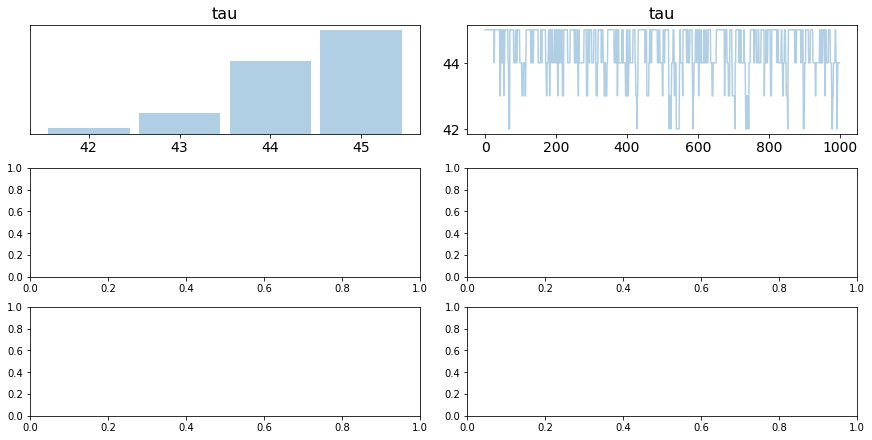

In [85]:
pm.traceplot(trace)

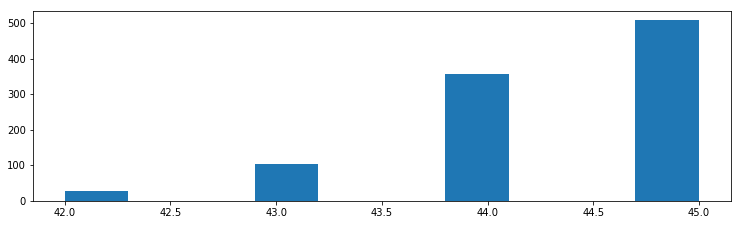

In [81]:
plt.hist(tau_)
plt.show()

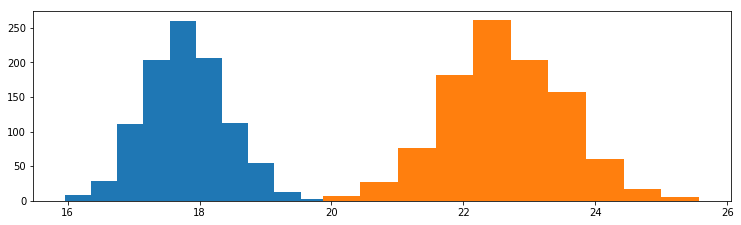

In [80]:
plt.hist(lambda_1_)
plt.hist(lambda_2_)
plt.show()

In [82]:
import theano.tensor as tt
sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.7


In [90]:
dir(pm.distributions.mixture)

['Discrete',
 'Distribution',
 'Iterable',
 'Mixture',
 'Normal',
 'NormalMixture',
 '_DrawValuesContext',
 '_DrawValuesContextBlocker',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_conversion_map',
 'all_discrete',
 'bound',
 'broadcast_distribution_samples',
 'draw_values',
 'generate_samples',
 'get_tau_sigma',
 'get_variable_name',
 'logsumexp',
 'np',
 'random_choice',
 'theano',
 'to_tuple',
 'tt']

# コイントス

In [38]:
observed = [1, 0, 0,0]
h = observed.count(1)
n = len(observed)

# 二項分布のパラメータpの事前分布(一様分布を設定)
with pm.Model() as model:
    
    alpha, beta = 1, 1
    p = pm.Beta('p', alpha=alpha, beta=beta)

    # コイン投げの試行は二項分布に従うのでBinomial
    obs = pm.Binomial('y', n=n, p=p, observed=observed)
    
    trace = pm.sample(1000, chains = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [p]
100%|██████████| 1500/1500 [00:00<00:00, 2150.91it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c27628cf8>,
      dtype=object)

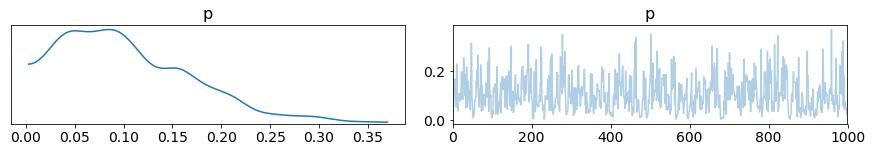

In [39]:
az.plot_trace(trace)

In [50]:
def calc_ab(trace):
    ex = trace["p"].mean()
    varx = trace["p"].var()
    
    alpha = ((ex**2) * ( 1 - ex) * 1 / varx ) - ex
    beta = (alpha / ex) - alpha
    
    return alpha, beta

In [44]:
ex = trace["p"].mean()

In [45]:
varx = trace["p"].var()

In [46]:
alpha = ((ex**2) * ( 1 - ex) * 1 / varx ) - ex
alpha

2.036799351354375

In [48]:
beta = (alpha / ex) - alpha
beta

17.075361357716176

In [51]:
alpha, beta = calc_ab(trace)

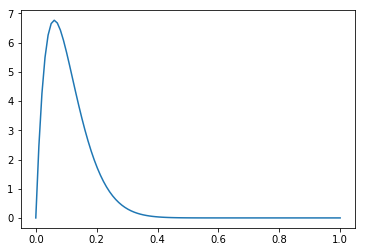

In [52]:
#beta

x = np.linspace(0, 1, 100)
y = stats.beta(alpha, beta).pdf(x)

plt.plot(x, y)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [p]
100%|██████████| 1500/1500 [00:00<00:00, 2316.97it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


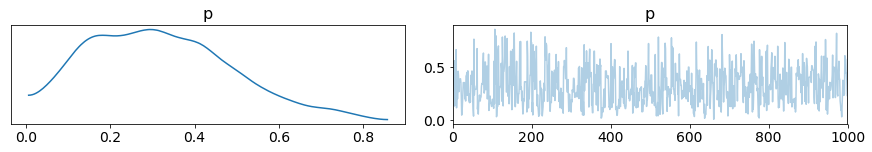

alpha: 2.0242914630970477
beta: 4.156638817113294


In [61]:
observed = [1, 0]
n = len(observed)

with pm.Model() as model_1:
    p = pm.Beta("p", alpha = 1, beta = 1)
    obs = pm.Binomial("obs", n=n, p=p, observed=observed)
    
    trace = pm.sample(1000, chains=1)

az.plot_trace(trace)
plt.show()

alpha , beta = calc_ab(trace)
print("alpha:", alpha)
print("beta:", beta)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [p]
100%|██████████| 1500/1500 [00:00<00:00, 2308.14it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


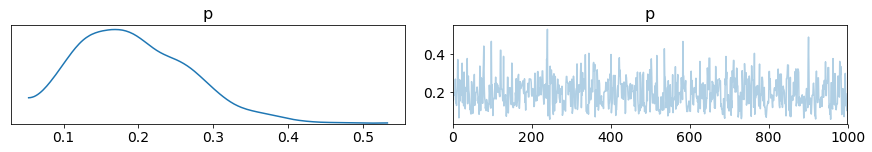

alpha: 4.033992927934176
beta: 18.120235988643742


In [92]:
observed = [1, 0]
n = len(observed)

with pm.Model() as model_2:
    p = pm.Beta("p", alpha = alpha, beta = beta)
    obs = pm.Binomial("obs", n=n, p=p, observed=observed)
    
    trace = pm.sample(1000, chains=1)

az.plot_trace(trace)
plt.show()

#alpha , beta = calc_ab(trace)
print("alpha:", alpha)
print("beta:", beta)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c291750f0>,
      dtype=object)

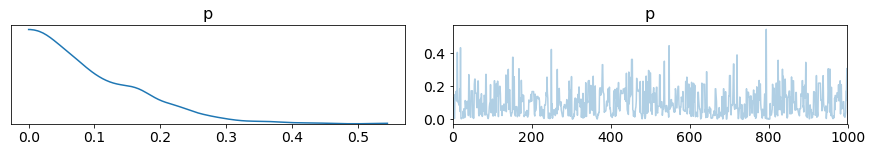

In [87]:
pm.traceplot(trace)